 ## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

h
θ
(
x
)
=
θ
0
x
0
+
θ
1
x
1
+
.
.
.
+
θ
j
x
j
+
.
.
.
+
θ
n
x
n
.
(
x
0
=
1
)
x
 : 特徴量ベクトル

θ
 : パラメータベクトル

n
 : 特徴量の数

x
j
 : j番目の特徴量

θ
j
 : j番目のパラメータ（重み）

特徴量の数
n
は任意の値に対応できる実装にしてください。

なお、ベクトル形式で表すと以下のようになります。

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
import numpy as np
from numpy.random import *
import random

In [4]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
#     randint(0,1,(X.shape[0]+1,5))
    a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    X = np.hstack([a ,X])
    self.Theta = np.random.random_sample((X.shape[1]+1, 1))
    self.y_ = self.Theta @ X.T
    return self.y_

In [5]:
def linear_hypothesis(X):
    a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    X = np.hstack([a ,X])
    Theta = np.random.random_sample((1,X.shape[1]))
    y = Theta @ X.T
    return y

 ## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

θ
j
:=
θ
j
−
α
1
m
m
∑
i
=
1
 
[
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
]
α
 : 学習率

i
 : サンプルのインデックス

j
 : 特徴量のインデックス

In [6]:
def _get_error(self, y):
    self.error = self.y_ - y
    self.error = self.error.T
    return self.error

In [7]:
def linear_hypothesis(X):
    a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    X = np.hstack([a ,X])
    Theta = np.random.random_sample((1,X.shape[1]))
    y = Theta @ X.T
    return y

In [8]:
def get_error(y):
    y_n = linear_hypothesis(X)
    error = y_n - y
    error = error.T
    return error

In [9]:
def gradient_descent(X):
    Theta = Theta - 0.01 * (error.T * X).sum() / x.shape[0]
    return Theta

In [10]:
error = get_error(y)
Theta = np.random.random_sample((1,X.shape[1]))
Theta = Theta - 0.01 * (error * X).sum() / X.shape[0]
Theta

array([[-0.33049545, -0.17249613,  0.12435621, -0.14154832]])

In [11]:
i = get_error(y)
i.shape

(150, 1)

In [12]:
def _gradient_descent(self, X, error):
    """
    パラメータの更新式
    学習率を0.01として作成
    """
#     self.Theta = self.Theta - 0.01 * ((self.y_ - y) * X.T).sum() / x.shape[0]
    self.Theta = self.Theta - 0.01 * ((self.error * X).sum()) / x.shape[0]
    return self.Theta

 ## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 
h
θ
(
x
)
 の出力が推定結果です。

In [13]:
def predict(self, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    pred_y = X @ self.Theta
    return pred_y

 ## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

L
(
θ
)
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.
m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解値

In [14]:
np.random.rand(1,X.shape[1])  

array([[0.13481066, 0.42480934, 0.7430156 , 0.99975703]])

In [1070]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    
    def _first(self, X):
        random.seed(1)
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
        self.Theta = np.random.rand(1,X.shape[1])  
        
    def _linear_hypothesis(self, X): 
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
        self.y_ = self.Theta @ X.T
        return self.y_


    def _get_error(self, y):
        self.error = self.y_ - y
        self.error = self.error.T
        return self.error
    
    
    def _gradient_descent(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
        self.Theta = self.Theta - self.lr * ((self.error * X).sum()) / X.shape[0]
        return self.Theta

    
    def pred(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
        self.y_ = self.Theta @ X.T
        return self.y_
    
    
    def _loss_fnk(self, y):
        F = ((self.error**2).sum()) / (2*X.shape[0])
        return self.loss_f
    
    
    
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self._first(X)

        
        for i in range(self.iter):
            self._linear_hypothesis(X)
            self._get_error(y)
            self._gradient_descent(X)
            self.pred(X)
            self.loss[i] = self._loss_fnk(y)
            if (X_val is not None) and (y_val is not None):
                self._linear_hypothesis(X_val)
                self.pred(X_val)
                self._get_error(y_val)
                self.val_loss[i] = self._loss_fnk(y_val)
                if self._loss_fnk(y) == 0:
                    break

        
        
        if self.verbose:
            print(self.loss)
            print(self.val_loss)
#             #verboseをTrueにした際は学習過程を出力
#             print()
#         pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.bias:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a ,X])
#         print(self.Theta.shape)
#         print(X.shape)
        self.pred = self.Theta @ X.T
        return self.pred

In [994]:
Sc = ScratchLinearRegression(num_iter=1000, lr=0.0001, bias=True, verbose=True)
Sc.fit(X, y)
Sc.predict(X)

[6.56921177 6.27786921 5.99980008 5.73439964 5.48109071 5.23932242
 5.00856897 4.78832854 4.57812216 4.37749267 4.18600377 4.00323901
 3.82880092 3.66231015 3.50340461 3.35173874 3.20698269 3.06882165
 2.93695516 2.81109645 2.6909718  2.57631997 2.46689162 2.36244877
 2.26276429 2.16762138 2.07681314 1.99014208 1.90741971 1.82846613
 1.75310964 1.68118635 1.61253986 1.54702086 1.48448688 1.42480192
 1.36783617 1.31346575 1.26157243 1.21204334 1.16477077 1.11965192
 1.07658866 1.03548734 0.99625857 0.95881705 0.92308135 0.88897375
 0.85642007 0.82534953 0.79569454 0.76739062 0.74037621 0.71459257
 0.68998362 0.66649583 0.64407814 0.62268179 0.60226025 0.5827691
 0.56416596 0.54641037 0.52946372 0.51328914 0.49785148 0.48311714
 0.4690541  0.45563176 0.44282093 0.43059376 0.41892366 0.40778523
 0.39715427 0.38700765 0.37732331 0.36808018 0.35925816 0.35083807
 0.3428016  0.33513126 0.32781038 0.32082303 0.31415403 0.30778886
 0.30171369 0.29591529 0.29038107 0.28509899 0.28005755 0.27524

array([[0.78995449, 0.67973351, 0.73173493, 0.74425556, 0.82337727,
        0.93814616, 0.81872759, 0.78763097, 0.69507609, 0.70644235,
        0.83100639, 0.81873024, 0.67443055, 0.67053593, 0.82984938,
        1.01055129, 0.87876958, 0.80338501, 0.87503773, 0.89411481,
        0.78480902, 0.88225011, 0.79651094, 0.82418803, 0.86326267,
        0.70129423, 0.82933615, 0.79667107, 0.75653171, 0.77626736,
        0.74284458, 0.78198176, 0.93501188, 0.93451079, 0.71987287,
        0.6925081 , 0.7426001 , 0.81807432, 0.70552717, 0.77950341,
        0.79666842, 0.53376357, 0.75611761, 0.88149241, 0.96692191,
        0.70129158, 0.89552844, 0.75470663, 0.83913395, 0.74749161,
        1.21066811, 1.24317571, 1.23661925, 0.98758501, 1.1487114 ,
        1.17202672, 1.31971729, 0.91744505, 1.13901803, 1.11173496,
        0.83782489, 1.18869064, 0.88136043, 1.2079305 , 1.0718522 ,
        1.16522314, 1.25760575, 1.03893581, 1.00647861, 0.98834272,
        1.3686375 , 1.06529575, 1.13361329, 1.15

In [995]:
y_pred = Sc.predict(X_train)
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse

In [996]:
MSE(y_pred, y_train)

0.24305012797044995

 ## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） 
J
(
θ
)
 は次の式です。

J
(
θ
)
=
1
2
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.
m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解値

In [997]:
X = iris.data
y = iris.target

In [998]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [999]:
Sc = ScratchLinearRegression(num_iter=2000, lr=0.0001, bias=False, verbose=True)
Sc.fit(X = X_train, y = y_train, X_val=X_test, y_val=y_test)

[28.79475756 27.63164003 26.51605548 ...  0.33361654  0.33361654
  0.33361654]
[11.42400139 10.97261089 10.53946948 ...  0.14415549  0.14415549
  0.14415549]


In [1000]:
Sc.loss[:20]

array([28.79475756, 27.63164003, 26.51605548, 25.44606136, 24.41979454,
       23.43546803, 22.49136786, 21.58585009, 20.717338  , 19.88431927,
       19.0853434 , 18.31901917, 17.5840122 , 16.87904266, 16.20288302,
       15.5543559 , 14.93233204, 14.33572835, 13.76350598, 13.21466854])

In [1001]:
Sc.val_loss[:20]

array([11.42400139, 10.97261089, 10.53946948, 10.12383546,  9.72499736,
        9.3422727 ,  8.97500681,  8.6225717 ,  8.28436496,  7.95980872,
        7.64834866,  7.34945304,  7.06261178,  6.78733556,  6.523155  ,
        6.26961984,  6.02629816,  5.7927756 ,  5.56865469,  5.35355415])

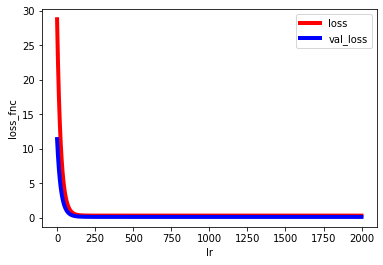

In [1002]:
import matplotlib.pyplot as plt
plt.plot(range(2000), Sc.loss, linewidth=4, color="red", label="loss")
plt.plot(range(2000), Sc.val_loss, linewidth=4, color="blue", label="val_loss")
plt.ylabel("loss_fnc")
plt.xlabel("lr")
plt.legend()


In [1003]:
Sc.predict(X_test)

array([[0.74817189, 1.2674677 , 1.62552509, 1.39047161, 1.43002089,
        0.91537637, 1.38830728, 1.33998364, 1.37209056, 1.2312253 ,
        1.246729  , 1.28077791, 1.31150268, 1.25691954, 1.2366686 ,
        1.47274805, 1.16222552, 1.14886887, 1.2909915 , 1.47562538,
        0.8713638 , 1.09313513, 1.41025157, 1.2407699 , 1.07550756,
        1.34709771, 1.4336059 , 1.27967374, 1.03951588, 1.34806096,
        1.1900096 , 1.05240718, 1.48311433, 1.08511424, 0.98375359,
        0.98674459, 1.58891022, 1.12533267, 1.13850808, 1.18900217,
        1.12830062, 1.33371866, 1.05287188, 1.27322688, 1.54857328]])

 ## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [1031]:
import pandas as pd

housing = pd.read_csv("/Users/naoki/train.csv")

In [1032]:
housing_int = housing
list_str = []
for i in housing.columns:
    if housing[i].dtypes == "O":
        housing_int = housing_int.drop(i,axis=1)
        list_str.append(i)

In [1033]:
housing_int = housing_int.fillna(0)
housing_int.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [1034]:
housing_str = housing[list_str]

In [1035]:
housing_str = pd.get_dummies(housing_str)

In [1036]:
housing_str.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [1037]:
housing_new = pd.concat([housing_int, housing_str], axis=1)
housing_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [1038]:
X = housing_new.drop(["SalePrice", "Id"], axis = 1)
# X = X.loc[:,["YrSold","LotArea"]]

In [1039]:
X = np.array(X)

In [1040]:
X.shape

(1460, 288)

In [1041]:
X = np.log1p(X)
y = np.log1p(y)

In [1042]:
y = housing_new["SalePrice"]
y = np.array(y)
y.shape

(1460,)

In [1043]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [1044]:
from sklearn.preprocessing import StandardScaler
 
 
# 標準化
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.fit_transform(X_test)

In [1045]:
Sc = ScratchLinearRegression(num_iter=2000, lr=0.000001, bias=True, verbose=True)
Sc.fit(X = X_train, y = y_train, X_val=X_test, y_val=y_test)

[1.45675794e+10 1.41014595e+10 1.36524080e+10 ... 1.83832114e+09
 1.83832114e+09 1.83832114e+09]
[4.78352763e+09 4.63361803e+09 4.48917512e+09 ... 6.56085329e+08
 6.56085329e+08 6.56085329e+08]


In [1046]:
Sc.val_loss

array([4.78352763e+09, 4.63361803e+09, 4.48917512e+09, ...,
       6.56085329e+08, 6.56085329e+08, 6.56085329e+08])

In [1047]:
Sc.predict(X_test)

array([[181308.86755389, 193498.82376162, 186020.97883583,
        207407.58970599, 173806.15898805, 186592.15085176,
        195321.22114951, 187695.48379438, 220193.10672017,
        176778.53767433, 174346.69821425, 170078.39062743,
        187077.155424  , 185859.77970487, 184199.91509341,
        177913.93339852, 196738.73431519, 145682.49105212,
        163440.93852969, 182123.66343741, 180713.85178391,
        178411.8854156 , 175803.86094836, 178355.92536785,
        198532.01090543, 194535.67335622, 185887.3922585 ,
        141836.60825888, 199061.36734669, 190142.96065927,
        181909.19270891, 211126.1079217 , 173995.65163076,
        211519.3900166 , 193792.37575025, 195211.30554879,
        197970.56900876, 181347.5194373 , 193193.76798703,
        210039.22642496, 187921.722145  , 168478.80823826,
        170203.65505704, 197516.54497895, 215164.6371855 ,
        189256.579344  , 180805.64863637, 175780.26427691,
        203919.24891822, 136305.15349979, 208338.0932866

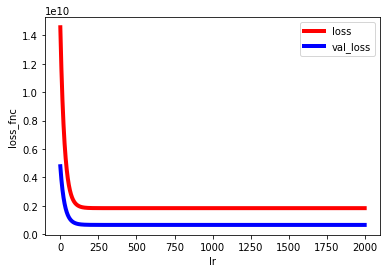

In [1055]:
import matplotlib.pyplot as plt
plt.plot(range(2000), Sc.loss, linewidth=4, color="red", label="loss")
plt.plot(range(2000), Sc.val_loss, linewidth=4, color="blue", label="val_loss")
plt.ylabel("loss_fnc")
plt.xlabel("lr")
plt.legend()


 ## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [1050]:
Sc = ScratchLinearRegression(num_iter=2000, lr=0.000001, bias=False, verbose=True)
Sc.fit(X = X_train, y = y_train, X_val=X_test, y_val=y_test)

[1.45676997e+10 1.41082134e+10 1.36653091e+10 ... 1.83534280e+09
 1.83534280e+09 1.83534280e+09]
[4.78579303e+09 4.63793901e+09 4.49539862e+09 ... 6.55071552e+08
 6.55071552e+08 6.55071552e+08]


In [1051]:
Sc.loss

array([1.45676997e+10, 1.41082134e+10, 1.36653091e+10, ...,
       1.83534280e+09, 1.83534280e+09, 1.83534280e+09])

In [1052]:
Sc.val_loss

array([4.78579303e+09, 4.63793901e+09, 4.49539862e+09, ...,
       6.55071552e+08, 6.55071552e+08, 6.55071552e+08])

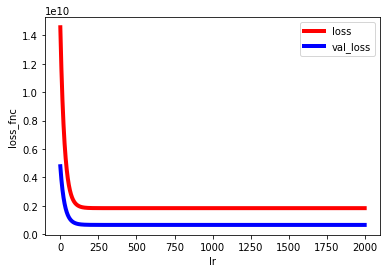

In [1053]:
import matplotlib.pyplot as plt
plt.plot(range(2000), Sc.loss, linewidth=4, color="red", label="loss")
plt.plot(range(2000), Sc.val_loss, linewidth=4, color="blue", label="val_loss")
plt.ylabel("loss_fnc")
plt.xlabel("lr")
plt.legend()